In [1]:
import sys
import os
import shutil
import functools
import time
import glob

%matplotlib inline
print("Running on ", time.asctime())

import numpy             as np
import tables            as tb
import matplotlib.pyplot as plt
from   matplotlib.colors import LogNorm
import pandas as pd

Running on  Wed Jul 11 12:25:12 2018


In [2]:
#cd /Users/austinmcdonald/Desktop/

In [4]:

#intable  =  tb.open_file('0nu-voxels.h5',mode='r')
intable  =  tb.open_file('/Users/austinmcdonald/Desktop/0nu-voxels.h5',mode='r')

to_df = pd.DataFrame.from_records
data = to_df(intable.root.events.voxels.read())
#data.head(20)
#data[data.event == 1]['X'].values
#data[data.event == 100]
data[data['event'].isin([100])]

,event,time,energy,energyS,X,Y,Z,E_v,ES_v,Etot_v,EStot_v
1382,100,0.0,2.457833,2.454385,208.832016,65.334145,281.239716,0.067783,0.067688,2.457833,2.454385
1383,100,0.0,2.457833,2.454385,208.832016,75.052666,272.393188,0.561297,0.560509,2.457833,2.454385
1384,100,0.0,2.457833,2.454385,208.832016,75.052666,281.239716,0.044244,0.044182,2.457833,2.454385
1385,100,0.0,2.457833,2.454385,217.419601,26.460052,272.393188,0.032398,0.032353,2.457833,2.454385
1386,100,0.0,2.457833,2.454385,217.419601,36.178574,272.393188,0.043921,0.043859,2.457833,2.454385
1387,100,0.0,2.457833,2.454385,217.419601,45.897095,272.393188,0.096573,0.096437,2.457833,2.454385
1388,100,0.0,2.457833,2.454385,217.419601,55.615620,272.393188,0.060963,0.060877,2.457833,2.454385
1389,100,0.0,2.457833,2.454385,217.419601,55.615620,281.239716,0.036542,0.036491,2.457833,2.454385
1390,100,0.0,2.457833,2.454385,226.007187,-2.695517,298.932800,0.033977,0.033929,2.457833,2.454385
1391,100,0.0,2.457833,2.454385,226.007187,16.741528,272.393188,0.029624,0.029583,2.457833,2.454385


In [21]:

energies               = data['energy'] .values
energies_Smear         = data['energyS'].values
voxel_energies         = data['E_v']    .values
voxel_energies_Smear   = data['ES_v']   .values
v_x                    = data['X']      .values
v_y                    = data['Y']      .values
v_z                    = data['Z']      .values
tot_energies_v         = data['Etot_v'] .values
tot_energies_Smear_v   = data['EStot_v'].values

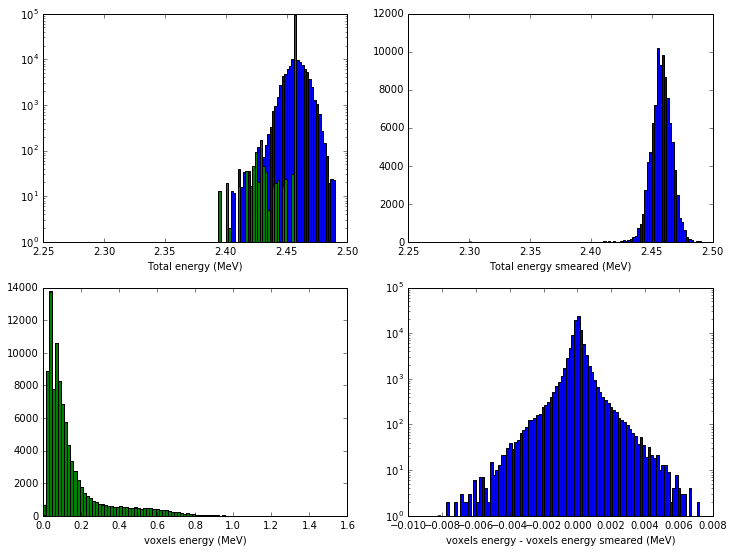

In [22]:
fig = plt.figure(figsize = (12,9))
bins = 100

ax1 = fig.add_subplot(2,2,1)
plt.hist(energies_Smear,bins,[2.3,2.5])
plt.hist(energies,bins,[2.3,2.5])
plt.yscale('log', nonposy='clip')
plt.xlabel('Total energy (MeV)')

ax2 = fig.add_subplot(2,2,2)
plt.hist(energies_Smear,bins,[2.3,2.5])
plt.xlabel('Total energy smeared (MeV)')


ax3 = fig.add_subplot(2,2,3)
plt.hist(voxel_energies_Smear, bins, stacked=True)
plt.hist(voxel_energies, bins, stacked=True, )
plt.xlabel('voxels energy (MeV)')


ax4 = fig.add_subplot(2,2,4)
plt.yscale('log', nonposy='clip')
plt.hist( voxel_energies - voxel_energies_Smear , bins)
plt.xlabel('voxels energy - voxels energy smeared (MeV)')


In [23]:
EventNumbers = data['event'].unique()

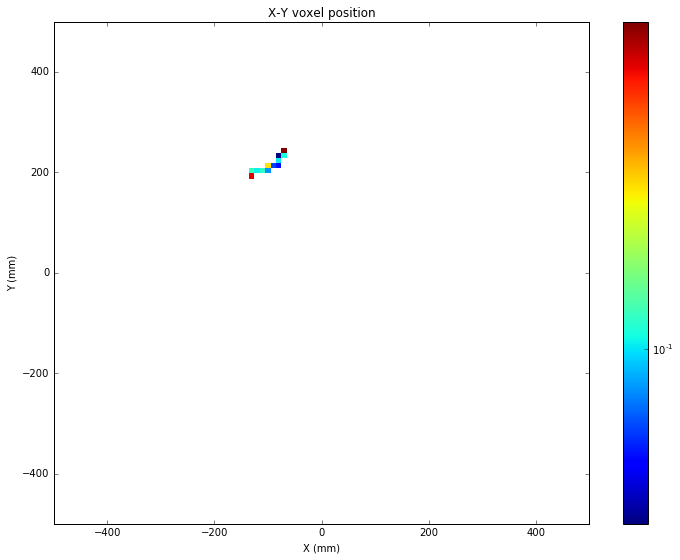

In [28]:

bins  =  100
EventNum = EventNumbers[7]
Weight = data[data.event == EventNum]['X'].values
voxelE  = data[data.event == EventNum]['E_v'].values
voxelS  = data[data.event == EventNum]['ES_v'].values
Xhit = data[data.event == EventNum]['X'].values
Yhit = data[data.event == EventNum]['Y'].values
Weight = voxelS

xedges, yedges = np.linspace(-500, 500, bins,endpoint=True), np.linspace(-500, 500, bins)
fig = plt.figure(figsize = (12,9))

plt.hist2d(Xhit, Yhit, bins=(xedges, yedges), weights=Weight, norm=LogNorm())
plt.colorbar()
plt.title('X-Y voxel position')
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')

plt.show()